In [1]:
%matplotlib inline
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2

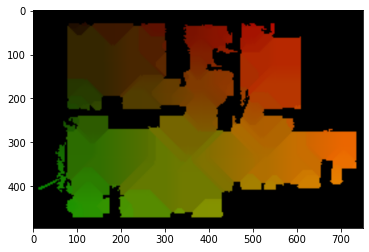

In [2]:
def resave(origin_img):
    img2 = cv2.resize(origin_img, (int(origin_img.shape[1]*3), int(origin_img.shape[0]*3)))
    plt.imshow(img2)
    cv2.imwrite("dp2.jpg", img2)
resave(cv2.imread("dp.jpg"))

(165, 250, 3)
(82, 125, 3)
(82, 125)


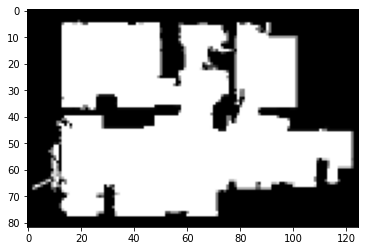

In [2]:
origin_img = cv2.imread("bw.jpg")
img0 = cv2.resize(origin_img, (int(origin_img.shape[1]/2), int(origin_img.shape[0]/2)))
img = image.fromarray(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB))
gimg = image.fromarray(cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY))
print(np.shape(origin_img))
print(np.shape(img))
print(np.shape(gimg))
plt.imshow(origin_img)
plt.imshow(img)

In [3]:
##单纯根据颜色聚类
def getVariables(img):
    data = []
    row, col = img.size
    #print(row, col)
    for i in range(row):
        for j in range(col):
            x, y, z = img.getpixel((i, j))
            data.append([x / 256.0, y / 256.0, z / 256.0])
    #print(np.shape(data))
    return data

def getLabel(data):
    label = KMeans(n_clusters=8).fit_predict(data)
    #print(np.shape(label))
    return label

def labelImg(img, label):
    row, col = img.size
    pic_new = image.new("L", (row, col))
    for i in range(row):
        for j in range(col):
            pic_new.putpixel((i, j), int(256 / (label[i][j] + 1.1)))
    #print(np.shape(pic_new))
    plt.imshow(pic_new)
    
def getVariables2(gimg):
    ##单纯根据灰度和区域坐标聚类
    data = []
    imgarray = np.array(gimg)
    #print(np.shape(imgarray))
    row, col = gimg.size
    #print(row, col)
    for i in range(row):
        for j in range(col):
            g = imgarray[j][i]
            if g > 1:
                data.append([j, i])
            else:
                data.append([-1,-1])
    return data

(10250, 2)
(125, 82)


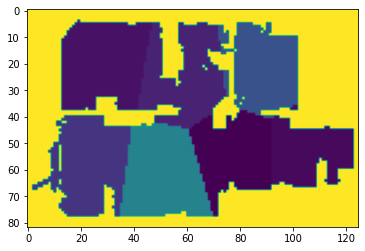

In [4]:
data = getVariables2(gimg)
print(np.shape(data))
label = getLabel(data)
label = np.reshape(label, img.size)
print(np.shape(label))
labelImg(img, label)

## sklearn 各种聚类

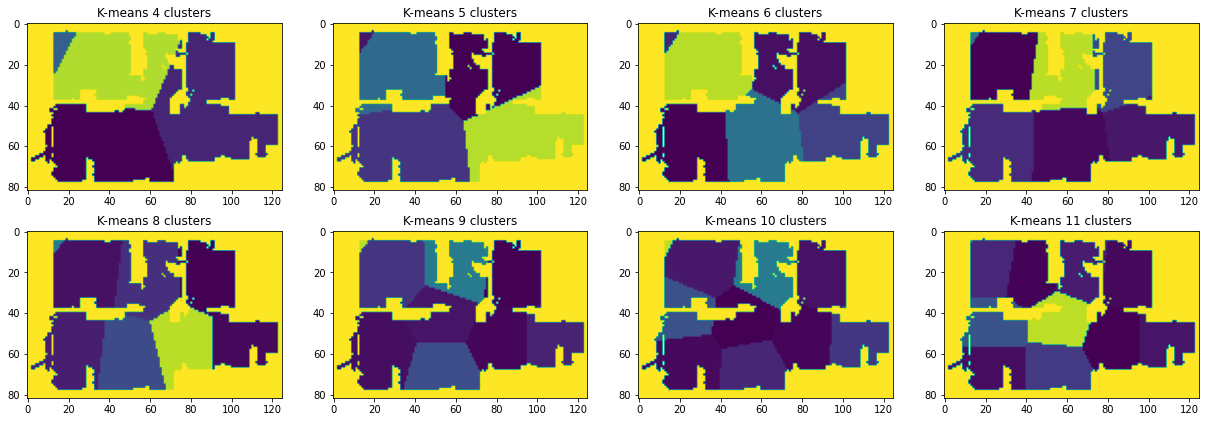

In [38]:
#plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(9 * 2 + 3, 7))
plt.title("Kmeans divide by K")
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

data = getVariables2(gimg)
for i in range(4,12):
    label = KMeans(n_clusters=i).fit_predict(data)
    for i1, v in enumerate(data):
        if v[0] < 0:
            label[i1] = -1
    label = np.reshape(label, img.size)
    plt.subplot(2,4,i-3)
    labelImg(img, label)
    #plt.text(.99, .1, "%s clusters"%(i), transform=plt.gca().transAxes, size=15, horizontalalignment='right')
    plt.title("K-means %s clusters"%(i))

time_str = time.strftime("%Y%m%d-%H:%M:%S", time.localtime(time.time()))
plt.savefig("kmeans_%s.png"%(time_str))
plt.show()

## DBSCAN各种聚类

In [52]:
cluster.DBSCAN?

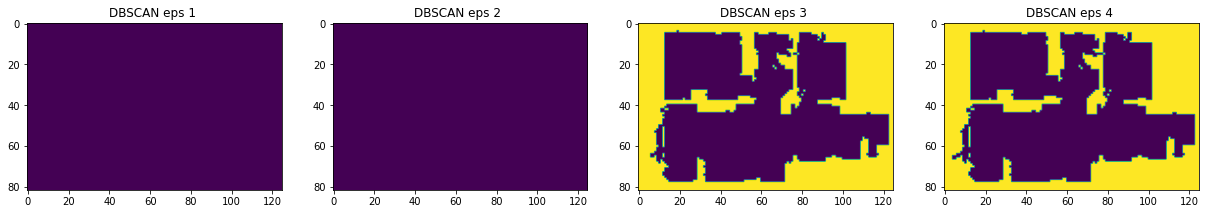

In [62]:
#plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(9 * 2 + 3, 7))
plt.title("Kmeans divide by K")
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

data = getVariables2(gimg)
for i in range(1,5):
    eps = i
    label = cluster.DBSCAN(eps = eps, min_samples= 20).fit_predict(data)
    for i1, v in enumerate(data):
        if v[0] < 0:
            label[i1] = -1
    label = np.reshape(label, img.size)
    plt.subplot(1,4,i)
    labelImg(img, label)
    #plt.text(.99, .1, "%s clusters"%(i), transform=plt.gca().transAxes, size=15, horizontalalignment='right')
    plt.title("DBSCAN eps %s "%(eps))

time_str = time.strftime("%Y%m%d-%H:%M:%S", time.localtime(time.time()))
plt.savefig("dbscan_%s.png"%(time_str))
plt.show()

## 层次各种聚类

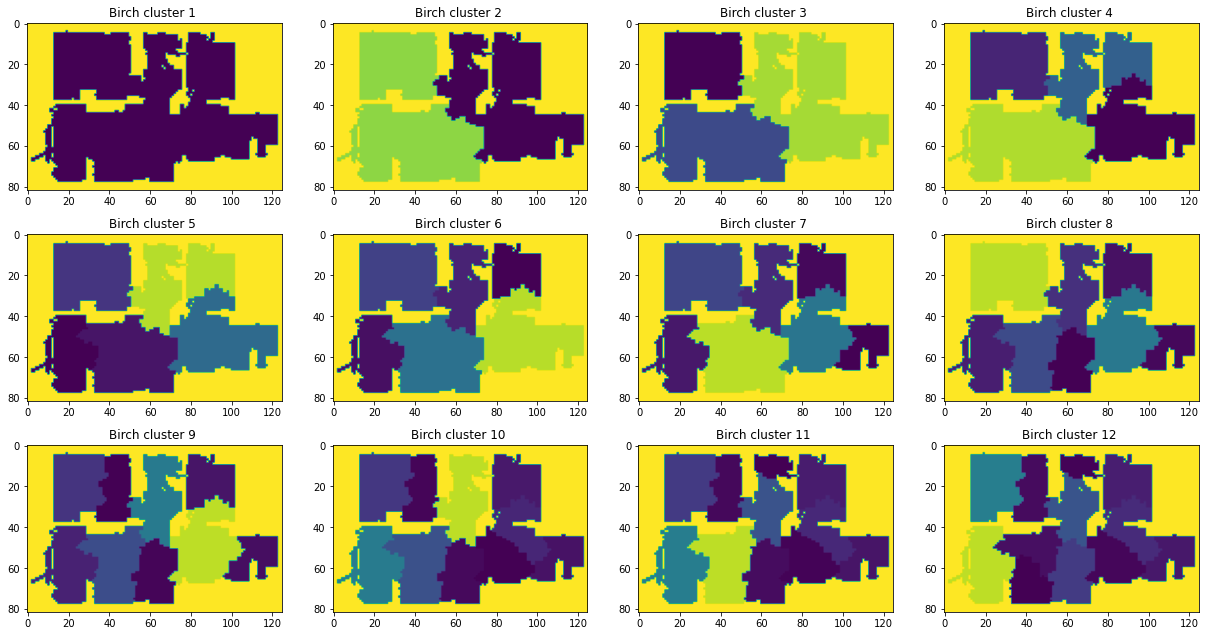

In [75]:
#plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(9 * 2 + 3, 11))
plt.title("Kmeans divide by K")
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

data = getVariables2(gimg)
for i in range(1,13):
    eps = i
    label = cluster.Birch(n_clusters=i).fit_predict(data)
    for i1, v in enumerate(data):
        if v[0] < 0:
            label[i1] = -1
    label = np.reshape(label, img.size)
    plt.subplot(3,4,i)
    labelImg(img, label)
    #plt.text(.99, .1, "%s clusters"%(i), transform=plt.gca().transAxes, size=15, horizontalalignment='right')
    plt.title("Birch cluster %s "%(i))

time_str = time.strftime("%Y%m%d-%H:%M:%S", time.localtime(time.time()))
plt.savefig("birch_%s.png"%(time_str))
plt.show()

In [65]:
cluster.Birch?

In [ ]:
谱聚类

/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/sklea

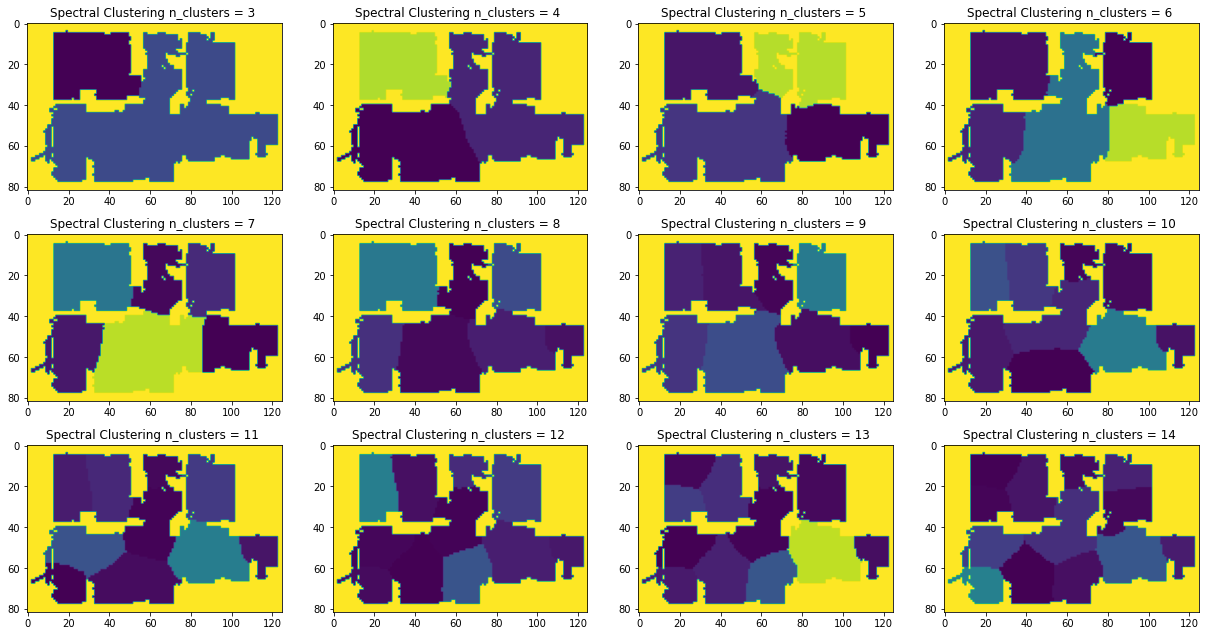

In [91]:
#plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(9 * 2 + 3, 11))
plt.title("Kmeans divide by K")
#plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

data = getVariables2(gimg)
for i in range(3,15):
    eps = i
    algo = spectral = cluster.SpectralClustering(
        n_clusters= i, 
        affinity="nearest_neighbors")
    
    label = algo.fit_predict(data)
    for i1, v in enumerate(data):
        if v[0] < 0:
            label[i1] = -1
    label = np.reshape(label, img.size)
    plt.subplot(3,4,i-2)
    labelImg(img, label)
    #plt.text(.99, .1, "%s clusters"%(i), transform=plt.gca().transAxes, size=15, horizontalalignment='right')
    plt.title("Spectral Clustering n_clusters = %s "%(i))

time_str = time.strftime("%Y%m%d-%H:%M:%S", time.localtime(time.time()))
plt.savefig("spc_%s.png"%(time_str))
plt.show() 

In [ ]:
cluster.spectral_clustering(n_clusters=3).pre

In [89]:
A = cluster.SpectralClustering(n_clusters=3, affinity="nearest_neighbors")

In [90]:
A.fit_predict(data)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [15]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    #(noisy_circles, {'damping': .77, 'preference': -240,'quantile': .2, 'n_clusters': 2}),
    #(noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
	(slam_data,{'damping': .75, 'preference': -220, 'n_clusters': 6})
    ]

Automatically created module for IPython interactive environment


NameError: name 'slam_data' is not defined

<Figure size 1512x900 with 0 Axes>

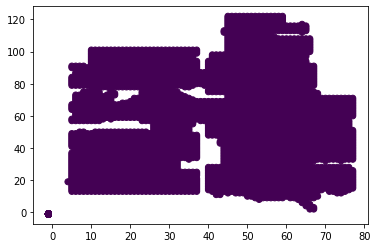

In [16]:
data = noisy_circles
data = noisy_moons
np.shape(data[1])
slam_data = (np.array(getVariables2(gimg)), [1 for i in range(len(getVariables2(gimg)))])
data = slam_data
np.shape(data[1])
plt.scatter(data[0][:,0], data[0][:,1], c= data[1])

In [40]:
# ============
# Set up cluster parameters
# ============
def get_datasets():
    default_base = {'quantile': .3,
                    'eps': .3,
                    'damping': .9,
                    'preference': -200,
                    'n_neighbors': 10,
                    'n_clusters': 3}

    datasets = []
    for i in range(1,5):
        tp = (slam_data,{'damping': .75, 'preference': -220, 'n_clusters': 2*i})
        datasets.append(tp)
    return datasets

datasets = get_datasets()

{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 2}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1 MiniBatchKMeans 0 {0, 1}
2 MeanShift 0 {0, 1, 2, 3}
3 SpectralClustering 0 {0, 1}
4 Birch 0 {0, 1}
5 GaussianMixture 0 {0, 1}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 4}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


6 MiniBatchKMeans 1 {0, 1, 2, 3}
7 MeanShift 1 {0, 1, 2, 3}
8 SpectralClustering 1 {0, 1, 2, 3}
9 Birch 1 {0, 1, 2, 3}
10 GaussianMixture 1 {0, 1, 2, 3}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 6}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


11 MiniBatchKMeans 2 {0, 1, 2, 3, 4, 5}
12 MeanShift 2 {0, 1, 2, 3}
13 SpectralClustering 2 {0, 1, 2, 3, 4, 5}
14 Birch 2 {0, 1, 2, 3, 4, 5}
15 GaussianMixture 2 {0, 1, 2, 3, 4, 5}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 8}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


16 MiniBatchKMeans 3 {0, 1, 2, 3, 4, 5, 6, 7}
17 MeanShift 3 {0, 1, 2, 3}
18 SpectralClustering 3 {0, 1, 2, 3, 4, 5, 6, 7}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (7) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters))


19 Birch 3 {0, 1, 2, 3, 4, 5, 6}
20 GaussianMixture 3 {0, 1, 2, 3, 4, 5, 6, 7}


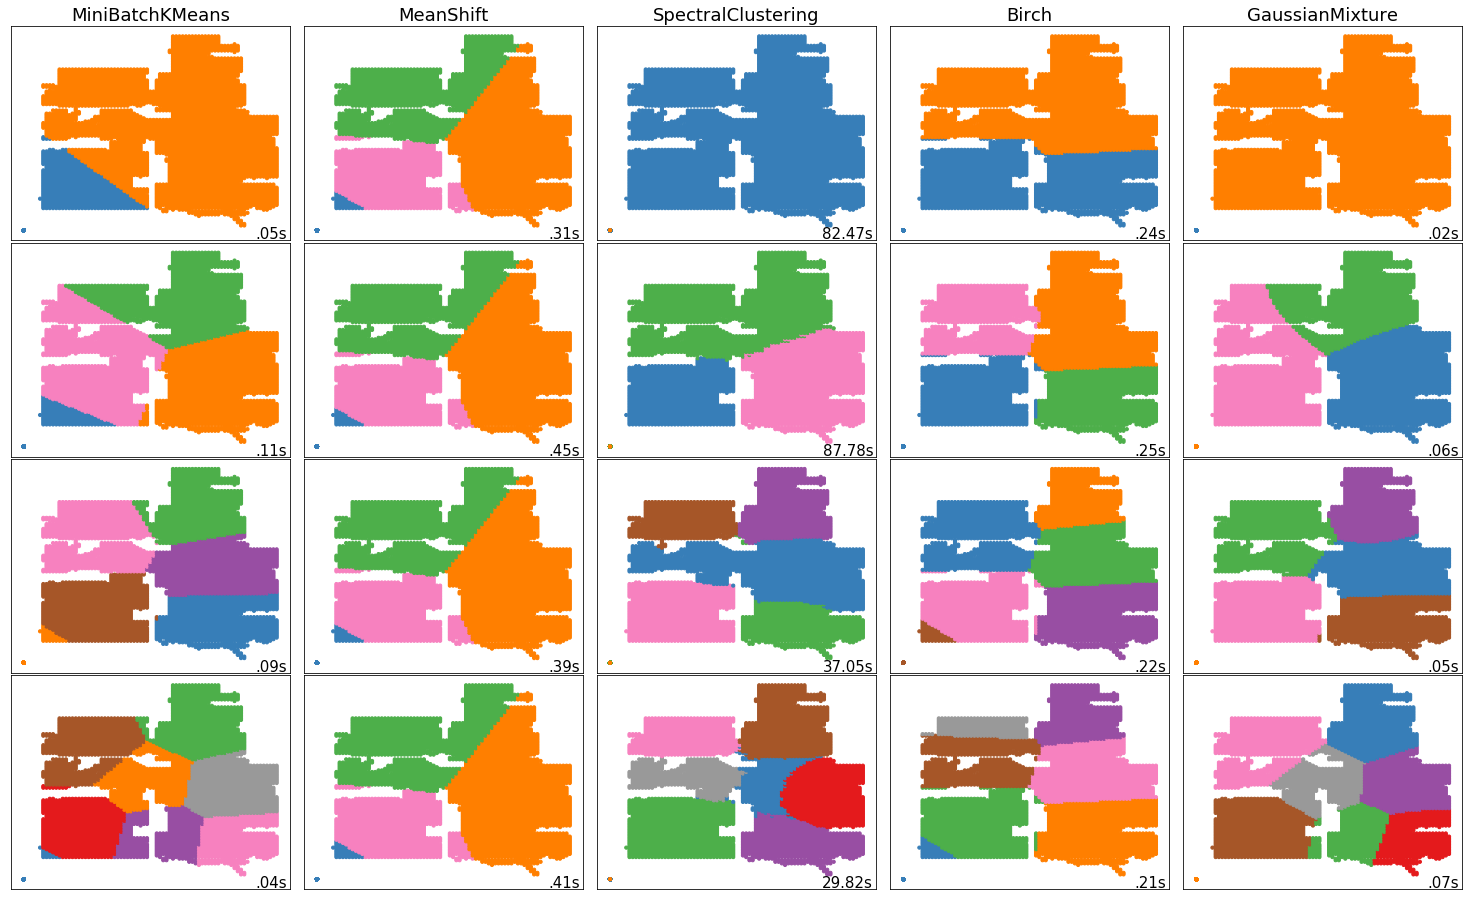

In [8]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    print(params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        #('AffinityPropagation', affinity_propagation),
        #('MeanShift', ms),
        ('SpectralClustering', spectral),
        #('Ward', ward),
        #('AgglomerativeClustering', average_linkage),
        #('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        print(plot_num, name, i_dataset, set(y_pred))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()

In [9]:
cluster.spectral_clustering?

{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 2}
1 MiniBatchKMeans 0 {0, 1}
2 MeanShift 0 {0, 1, 2, 3}
3 Birch 0 {0, 1}
4 GaussianMixture 0 {0, 1}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 4}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


5 MiniBatchKMeans 1 {0, 1, 2, 3}
6 MeanShift 1 {0, 1, 2, 3}
7 Birch 1 {0, 1, 2, 3}
8 GaussianMixture 1 {0, 1, 2, 3}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 6}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


9 MiniBatchKMeans 2 {0, 1, 2, 3, 4, 5}
10 MeanShift 2 {0, 1, 2, 3}
11 Birch 2 {0, 1, 2, 3, 4, 5}
12 GaussianMixture 2 {0, 1, 2, 3, 4, 5}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 8}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


13 MiniBatchKMeans 3 {0, 1, 2, 3, 4, 5, 6, 7}
14 MeanShift 3 {0, 1, 2, 3}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (7) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters))


15 Birch 3 {0, 1, 2, 3, 4, 5, 6}
16 GaussianMixture 3 {0, 1, 2, 3, 4, 5, 6, 7}


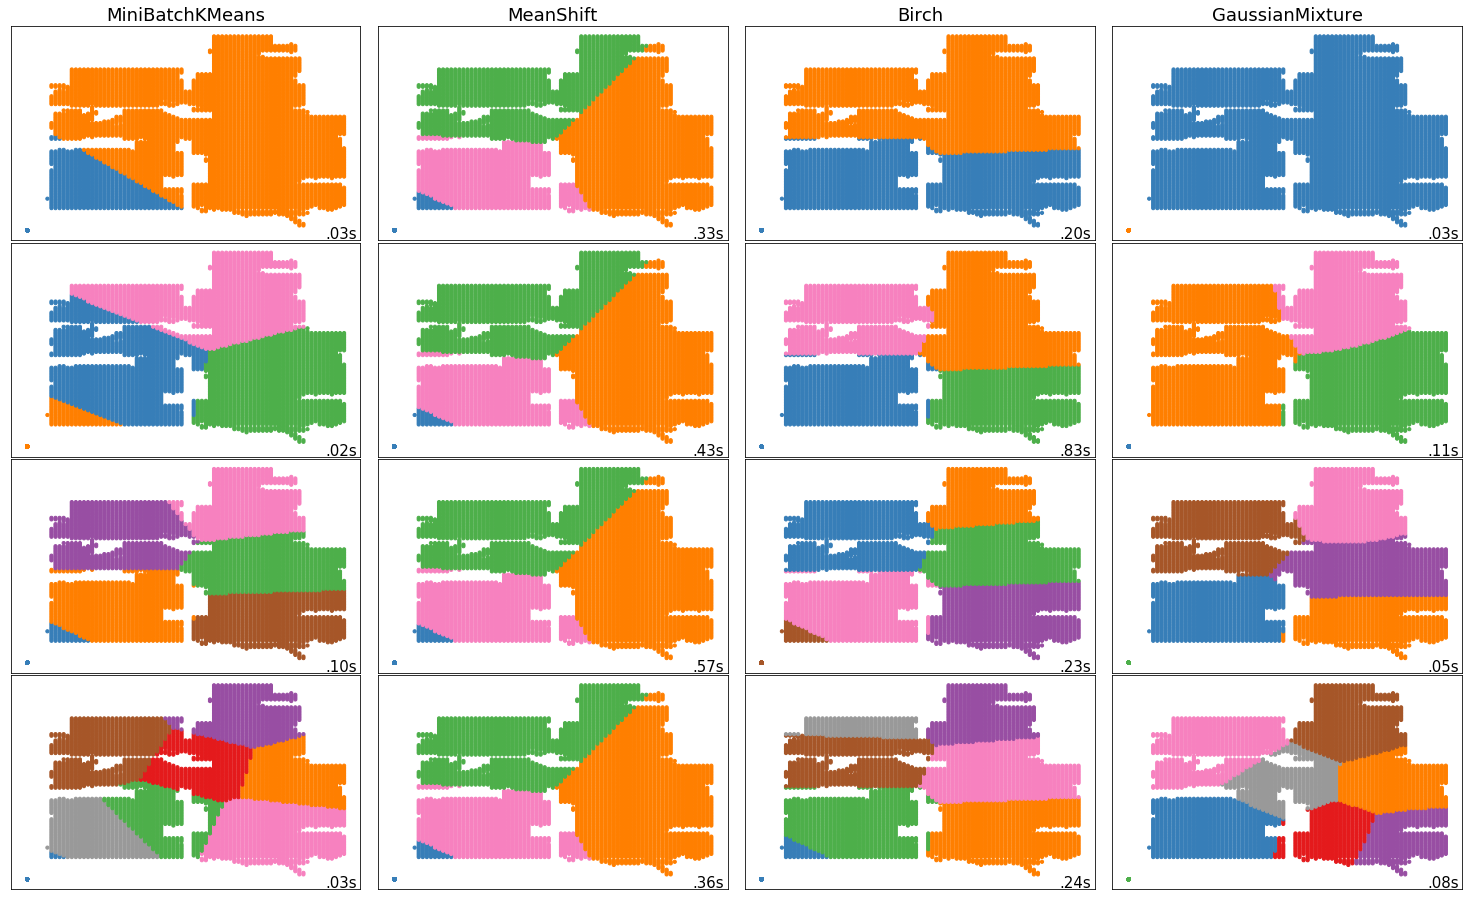

ValueError: Format 'jpg' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    print(params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        #('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        #('SpectralClustering', spectral),
        #('Ward', ward),
        #('AgglomerativeClustering', average_linkage),
        #('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        print(plot_num, name, i_dataset, set(y_pred))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()
time_str = time.strftime("%Y%m%d-%H:%M", time.localtime(time.time()))
plt.savefig("slam5_%s.png"%(time_str))

{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 2}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


1 MiniBatchKMeans 0 {0, 1}
2 MeanShift 0 {0, 1, 2, 3}
3 Birch 0 {0, 1}
4 GaussianMixture 0 {0, 1}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 4}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


5 MiniBatchKMeans 1 {0, 1, 2, 3}
6 MeanShift 1 {0, 1, 2, 3}
7 Birch 1 {0, 1, 2, 3}
8 GaussianMixture 1 {0, 1, 2, 3}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 6}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


9 MiniBatchKMeans 2 {0, 1, 2, 3, 4, 5}
10 MeanShift 2 {0, 1, 2, 3}
11 Birch 2 {0, 1, 2, 3, 4, 5}
12 GaussianMixture 2 {0, 1, 2, 3, 4, 5}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 8}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


13 MiniBatchKMeans 3 {0, 1, 2, 3, 4, 5, 6, 7}
14 MeanShift 3 {0, 1, 2, 3}


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (7) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters))


15 Birch 3 {0, 1, 2, 3, 4, 5, 6}
16 GaussianMixture 3 {0, 1, 2, 3, 4, 5, 6, 7}


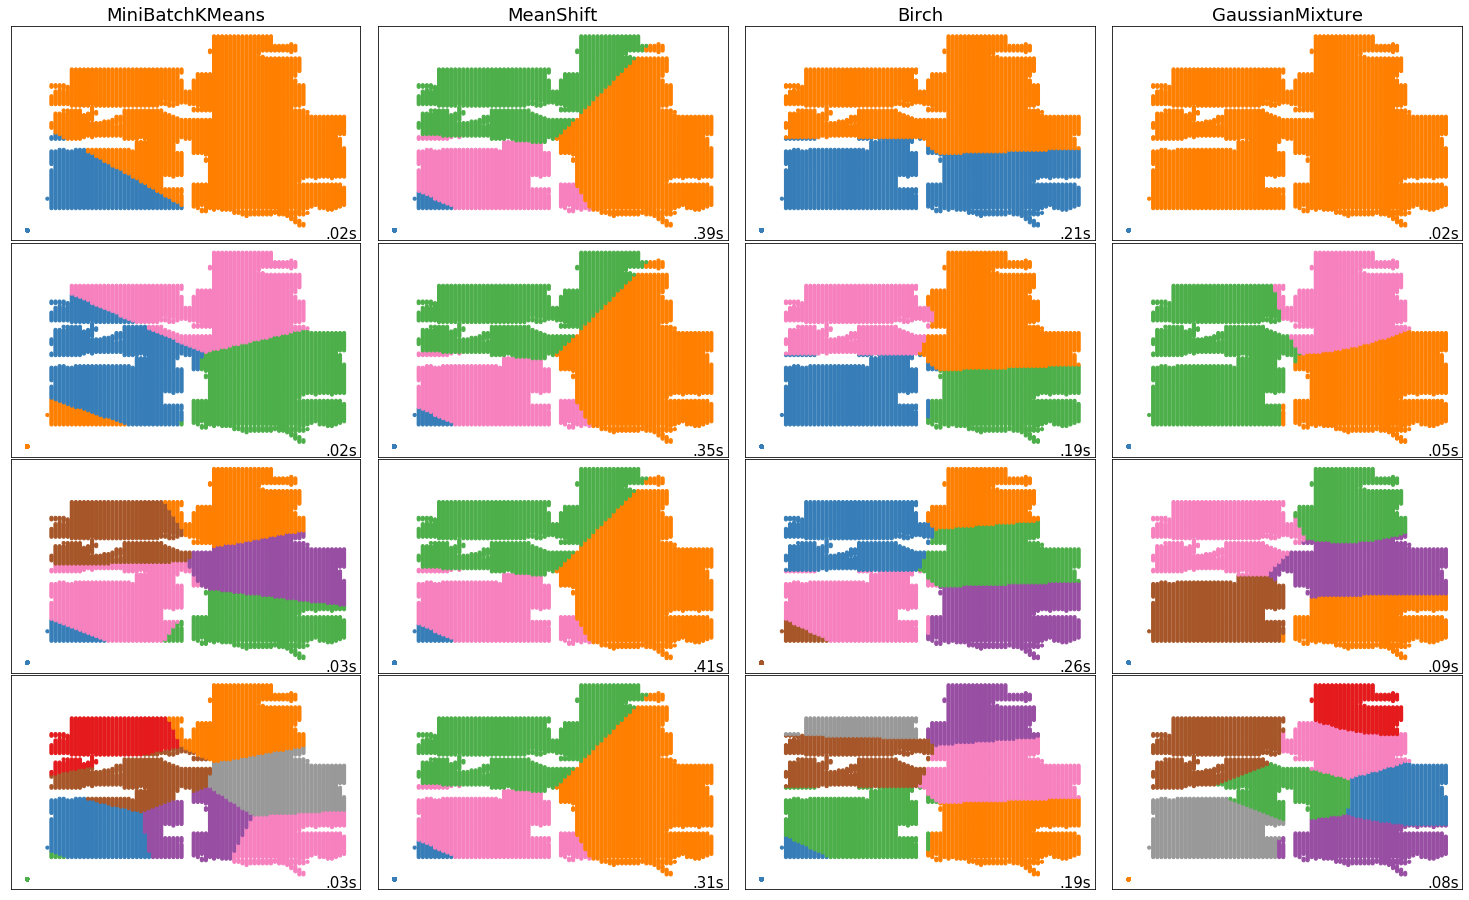

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    print(params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        #('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        #('SpectralClustering', spectral),
        #('Ward', ward),
        #('AgglomerativeClustering', average_linkage),
        #('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        print(plot_num, name, i_dataset, set(y_pred))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
plt.show()
time_str = time.strftime("%Y%m%d-%H:%M:%s", time.localtime(time.time()))
plt.savefig("slam5_%s.png"%(time_str))

{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 2}
1 MiniBatchKMeans 0 {0, 1}
2 SpectralClustering 0 {0, 1}
3 Birch 0 {0, 1}
4 GaussianMixture 0 {0, 1}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 4}
5 MiniBatchKMeans 1 {0, 1, 2, 3}
6 SpectralClustering 1 {0, 1, 2, 3}
7 Birch 1 {0, 1, 2, 3}
8 GaussianMixture 1 {0, 1, 2, 3}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 6}
9 MiniBatchKMeans 2 {0, 1, 2, 3, 4, 5}
10 SpectralClustering 2 {0, 1, 2, 3, 4, 5}
11 Birch 2 {0, 1, 2, 3, 4, 5}
12 GaussianMixture 2 {0, 1, 2, 3, 4, 5}
{'quantile': 0.3, 'eps': 0.3, 'damping': 0.75, 'preference': -220, 'n_neighbors': 10, 'n_clusters': 8}
13 MiniBatchKMeans 3 {0, 1, 2, 3, 4, 5, 6, 7}
14 SpectralClustering 3 {0, 1, 2, 3, 4, 5, 6, 7}


/usr/local/lib/python3.7/site-packages/sklearn/cluster/_birch.py:649: ConvergenceWarning: Number of subclusters found (7) by Birch is less than (8). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


15 Birch 3 {0, 1, 2, 3, 4, 5, 6}
16 GaussianMixture 3 {0, 1, 2, 3, 4, 5, 6, 7}


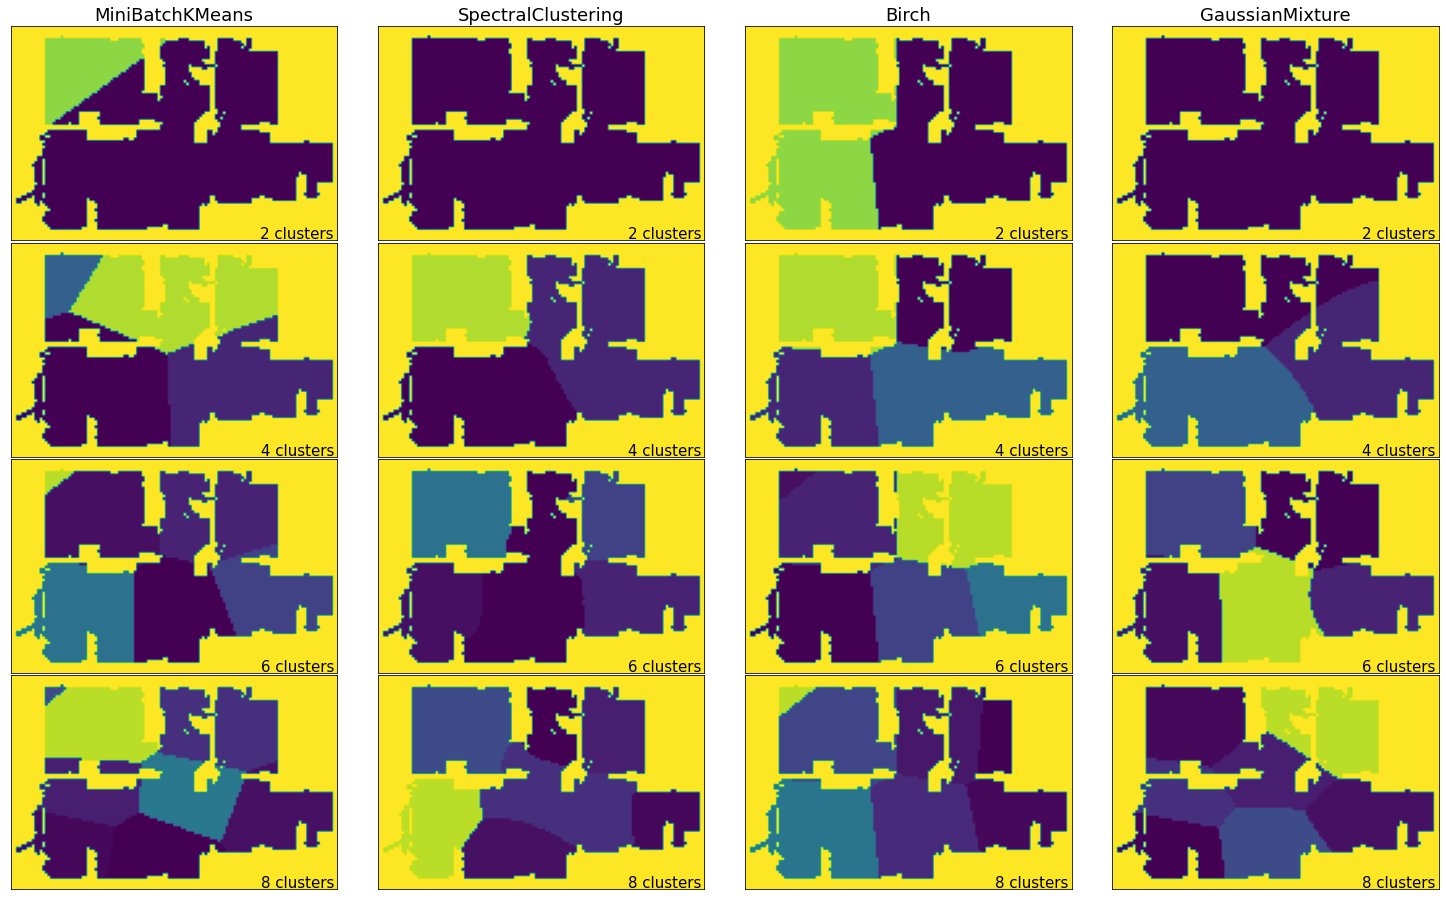

In [69]:
#datasets = [datasets[-1]]
datasets = get_datasets()
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    print(params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], 
        affinity="nearest_neighbors")
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        #('AffinityPropagation', affinity_propagation),
        #('MeanShift', ms),
        ('SpectralClustering', spectral),
        #('Ward', ward),
        #('AgglomerativeClustering', average_linkage),
        #('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        print(plot_num, name, i_dataset, set(y_pred))
        #plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        #label = np.reshape(y_pred, img.size)
        label = y_pred
        for i1, v in enumerate(data):
            if v[0] < 0:
                label[i1] = -1
        label = np.reshape(label, img.size)
        labelImg(img, label)
        
        #plt.xlim(-2.5, 2.5)
        #plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        
        #s1 = ('%.2fs' % (t1 - t0)).lstrip('0')
        s1 = "%d clusters"%(params['n_clusters'])
        plt.text(.99, .01, s1,
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1
time_str = time.strftime("%Y%m%d-%H:%M:%S", time.localtime(time.time()))
plt.savefig("slam5_%s.png"%(time_str))
plt.show()